# **Linear Regression with Python**
You work for a real estate company and it wants some help predicting housing prices for regions in California. It would be great if you could somehow create a model for that takes input a few features of a house and returns back an estimate of what the house would sell for.

### *Lets begin with exploring the historical data available.*


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("./sample_data/california_housing_train.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


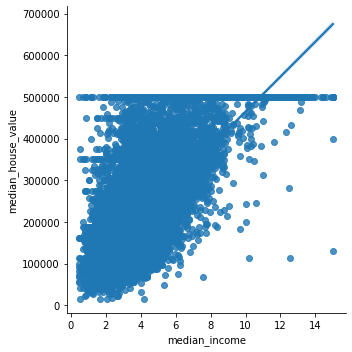

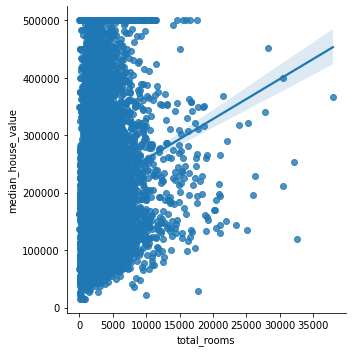

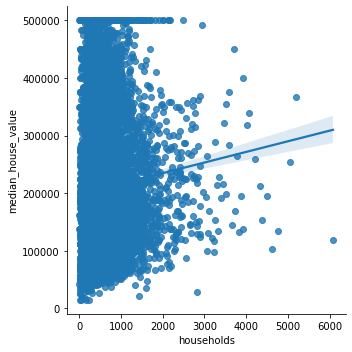

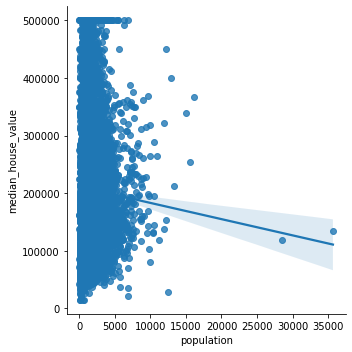

In [7]:
features=["median_income","total_rooms","households","population"]
for feature in features:
  sns.lmplot(x=feature,y="median_house_value",scatter=True,data=df)

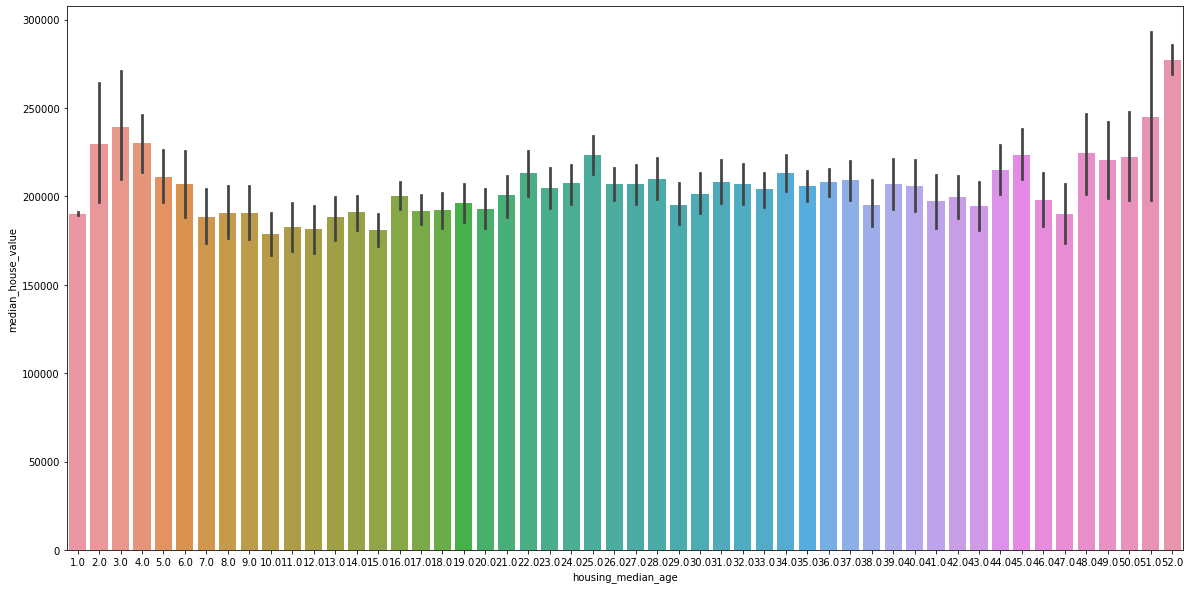

In [8]:
plt.figure(figsize=(20,10))
sns.barplot(x="housing_median_age",y="median_house_value",data=df)

## **Lets now create a map of California !**
<br>
Wouldn't it be nice to separate the map between costly and cheap 
housings ? 

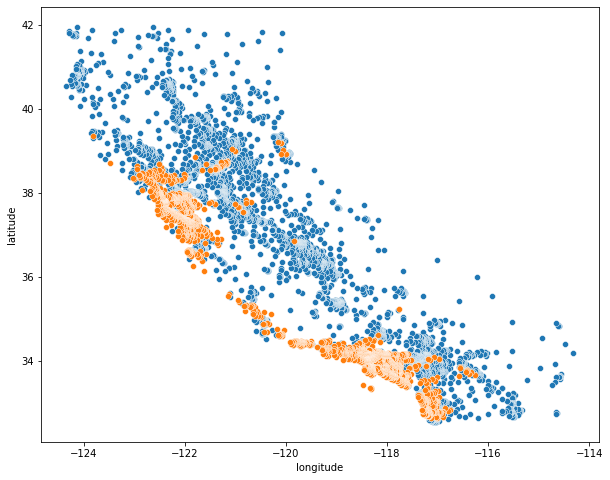

In [9]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="longitude",y="latitude",data=df[df["median_house_value"] < 265000.0])
sns.scatterplot(x="longitude",y="latitude",data=df[df["median_house_value"] > 265000.0])


In [10]:
df2=df.drop(labels="housing_median_age",axis=1) # the "housing_median_age" column doesn't seem to contribute much !

In [11]:
df2.head()

,longitude,latitude,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,1454.0,326.0,624.0,262.0,1.9250,65500.0


## **Training a Linear Regression Model**

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We have tossed out the "*median_house_age*" column because it has irrelevant info that the linear regression model can't utilise much.

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
X=df2.drop(labels="median_house_value",axis=1)
y=df2["median_house_value"]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [16]:
lm = LinearRegression()

In [17]:
lm.fit(X_train,y_train)

LinearRegression()

In [18]:
predictions = lm.predict(X_test)

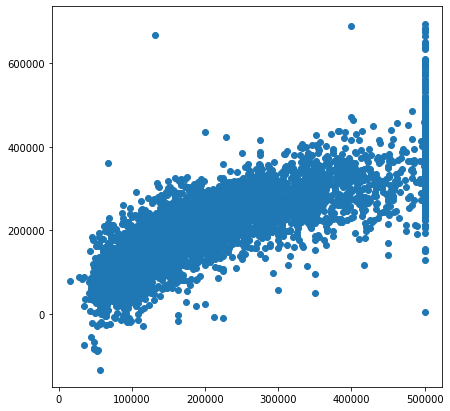

In [19]:
plt.figure(figsize=(7,7))
plt.scatter(y_test,predictions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


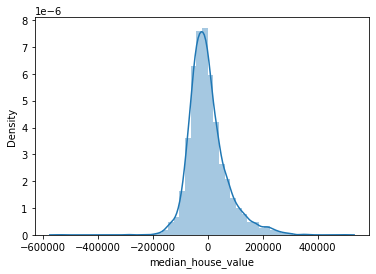

In [20]:
sns.distplot((y_test-predictions),bins=50)

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [23]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))

RMSE: 70114.76560205122
MAE: 51224.31920399288
MSE: 4916080355.430586


# **Congratulations on your first taste of ML !**